# Task 3 :To Explore Unsupervised Machine Learning

In [10]:
#Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.cluster import KMeans

In [2]:
# Load the iris dataset
iris = pd.read_csv(r'C:\Users\Vinu\Downloads\Iris.csv')
iris_df = pd.DataFrame(data=iris)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Preparing the dataset
x= iris_df.iloc[: , :-1].values 
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

# To predict optimum number of clusters

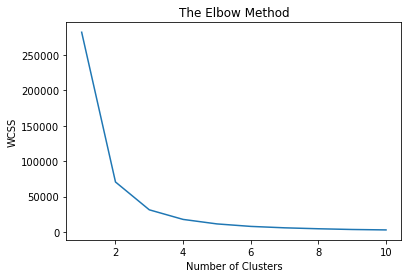

In [19]:
#here we can use wcss(within cluster sum of square) method
from sklearn.cluster import KMeans
wcss= []                              # Within Cluster Sum of Squares
for i in range(1,11):                 #(1,11)- for 10 clusters
    kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state=42)         #42 is taken as random number
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)        #inertia_   -    inbuilt attribute in KMeans
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method helps use find the optimum numbers of clusters. The optimum number of cluster is the number where elbow occurs in the elbow method.
In graph we can clearly see that elbow occurs at 3. So number of optimum clusters is 3.

In [15]:
# To train the KMeans model on Dataset
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters= 3, init= 'k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


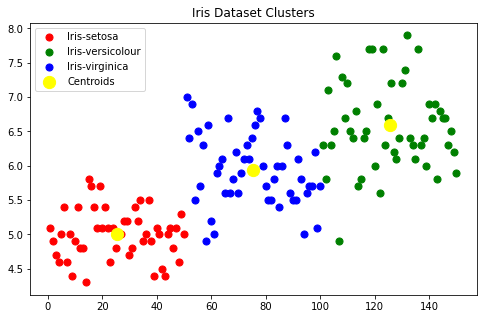

In [17]:
#To visualise the Clusters 

plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=50, c='red', label='Iris-setosa')#y_means==0- all the rows with y_means(cluster)==0   x- selecting columns from x 
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=50, c='green', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=50, c='blue', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label='Centroids')
plt.title('Iris Dataset Clusters')
plt.legend()
plt.show()